<a href="https://colab.research.google.com/github/sauravdey99/Logicmojo-AI-ML-Sept25-sauravdey/blob/main/Fish_Data_Polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/satishgunjal/datasets/master/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df.corr(numeric_only=True)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

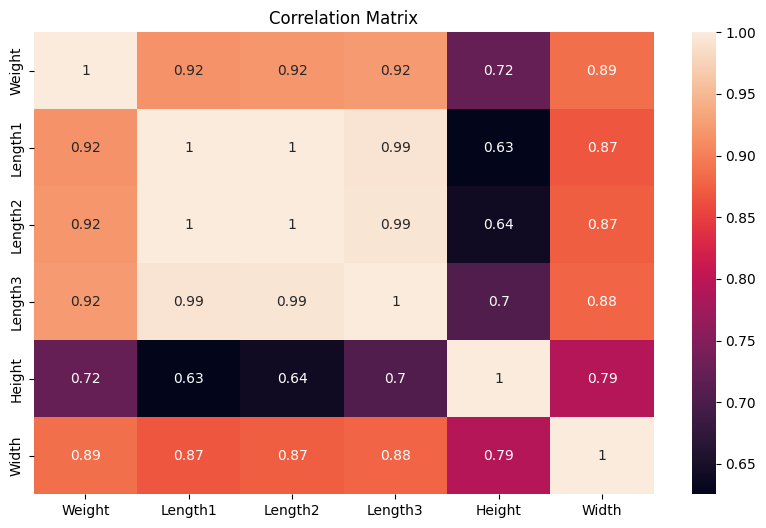

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot =True)
plt.title('Correlation Matrix')

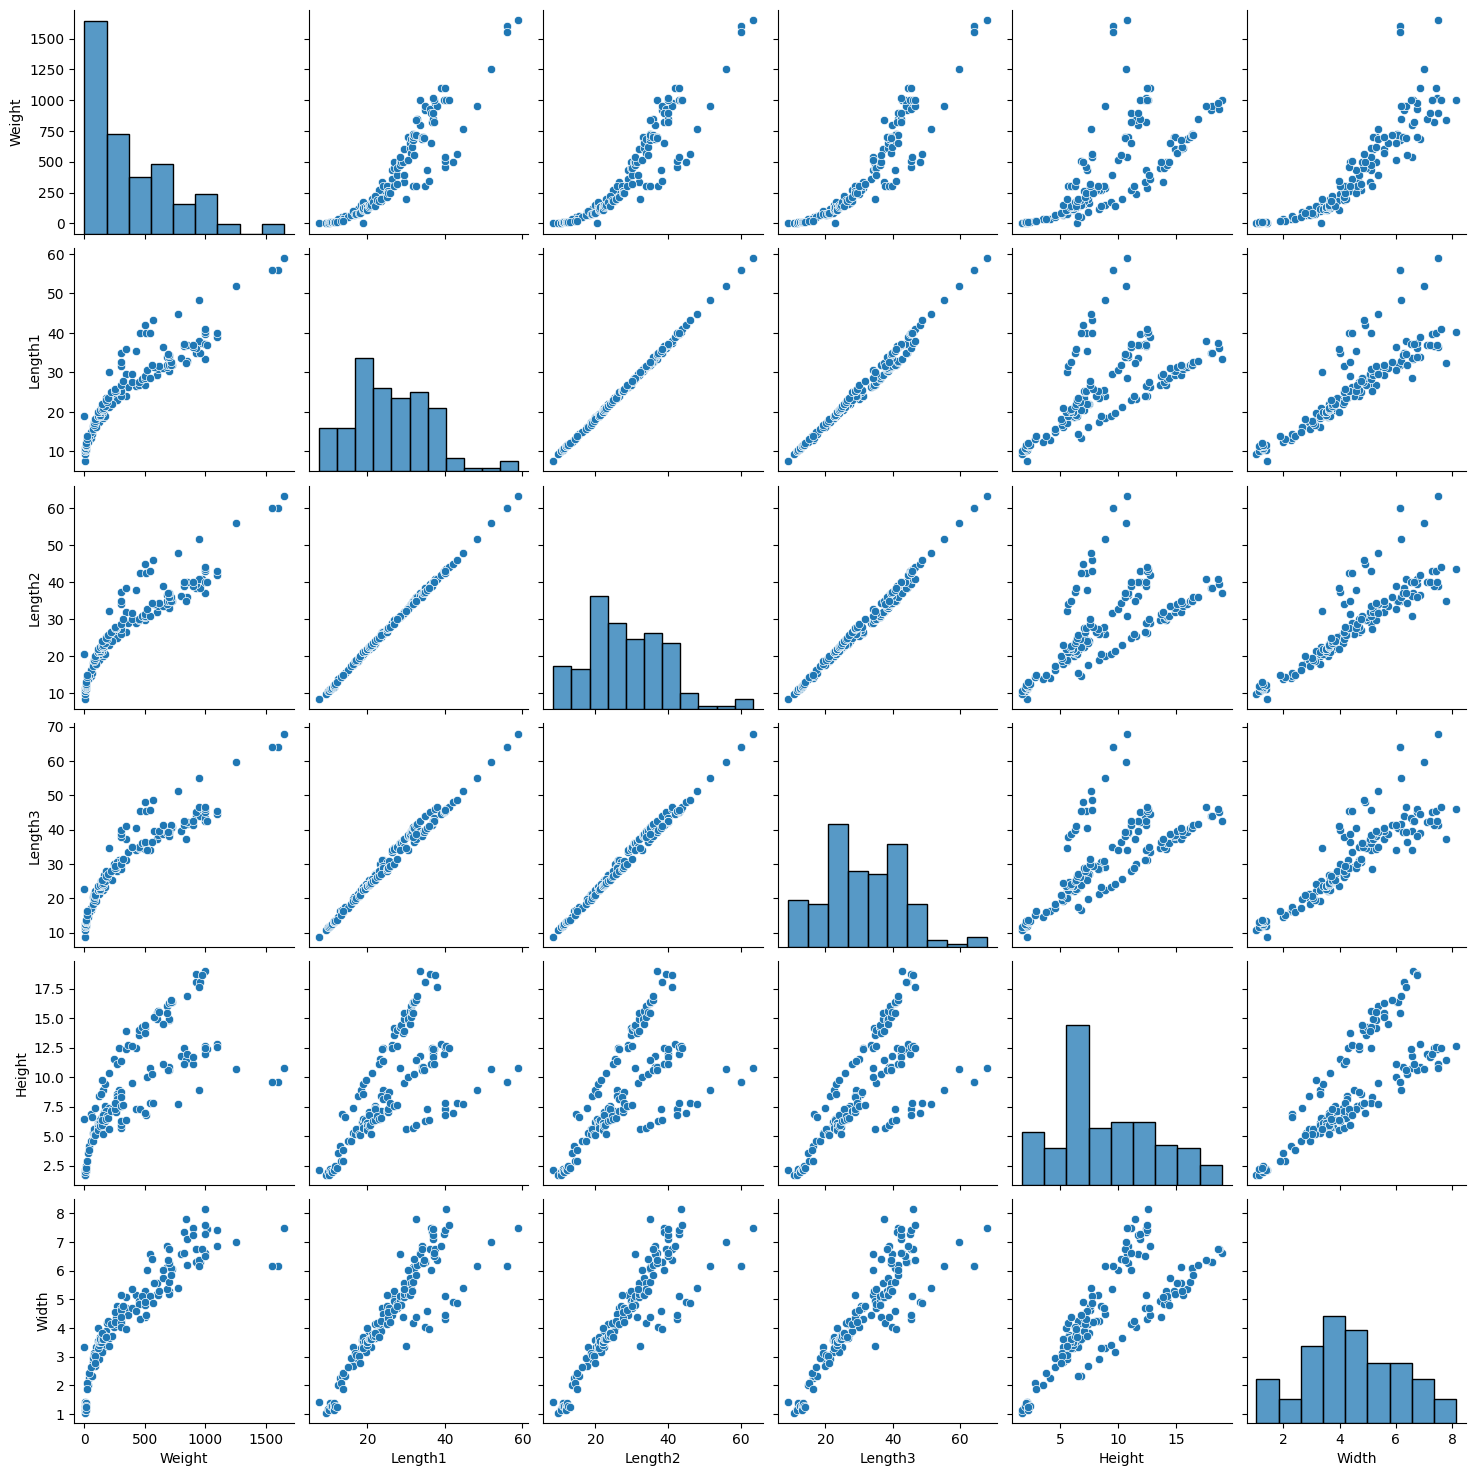

In [ ]:
sns.pairplot(data = df)

<Axes: xlabel='Width', ylabel='Weight'>

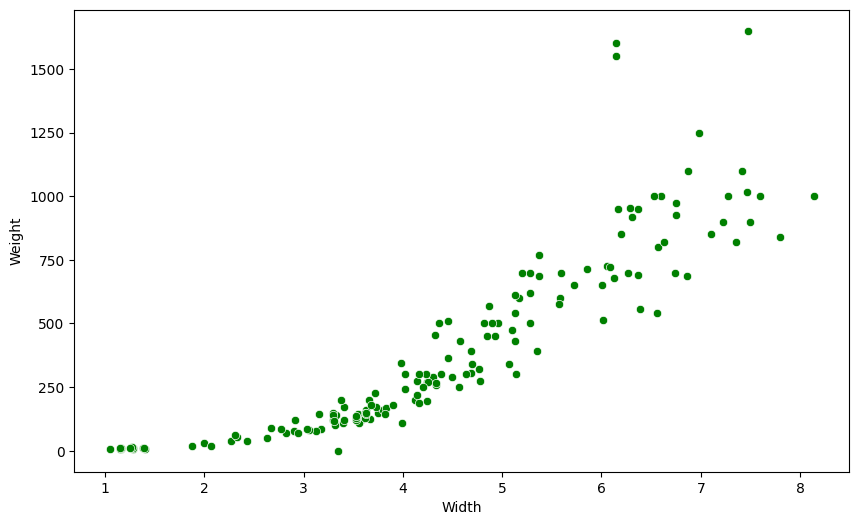

In [ ]:
sns.scatterplot(x = df['Width'],y = df['Weight'],data=df,color = 'g')

In [ ]:
df.shape

(159, 7)

#Column Name	Details
Species	Species name of fish
Weight	Weight of fish in gram
Length1	Vertical length in CM
Length2	Diagonal length in CM
Length3	Cross length in CM
Height	Height in CM
Width	Diagonal width in CM

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
df.rename(columns = {'Length1':'VerticalLength','Length2':'DiagonalLength','Length3':'CrossLength'},inplace = True)

In [ ]:
df

,Species,Weight,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [ ]:
yDf = df['Weight']

In [ ]:
xDf = df[['Species','VerticalLength', 'DiagonalLength', 'CrossLength',
       'Height', 'Width']]

In [ ]:
xDf

,Species,VerticalLength,DiagonalLength,CrossLength,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xDf,yDf,test_size = .3,random_state= 40)

In [ ]:
x_train

,Species,VerticalLength,DiagonalLength,CrossLength,Height,Width
15,Bream,29.4,32.0,37.2,15.4380,5.5800
3,Bream,26.3,29.0,33.5,12.7300,4.4555
66,Parkki,19.0,20.7,23.2,8.5376,3.2944
4,Bream,26.5,29.0,34.0,12.4440,5.1340
109,Perch,30.5,32.8,34.0,10.0300,6.0180
...,...,...,...,...,...,...
71,Parkki,24.0,26.0,29.0,11.3680,4.2340
12,Bream,29.1,31.5,36.4,13.7592,4.3680
50,Roach,22.1,23.5,26.8,7.3968,4.1272
7,Bream,27.6,30.0,35.0,12.6700,4.6900


# One hot Encodin

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
x_train_onehot = oh.fit_transform(x_train[['Species']])
x_test_onehot = oh.transform(x_test[['Species']])

In [ ]:
type(x_train_onehot)

scipy.sparse._csr.csr_matrix

In [ ]:
x_train_onehot = pd.DataFrame(
    x_train_onehot.toarray(),
    columns=oh.get_feature_names_out(),
    index=x_train.index
)

In [ ]:
x_test_onehot = pd.DataFrame(
    x_test_onehot.toarray(),
    columns=oh.get_feature_names_out(),
    index=x_test.index
)

In [ ]:
x_train  = pd.concat(
    [x_train[['VerticalLength', 'DiagonalLength', 'CrossLength', 'Height', 'Width']],
     x_train_onehot],
    axis=1
)

In [ ]:
x_test = pd.concat(
    [x_test[['VerticalLength', 'DiagonalLength', 'CrossLength', 'Height', 'Width']],
     x_test_onehot],
    axis=1
)

In [ ]:
x_train.shape

(111, 12)

In [ ]:
y_test.shape

(48,)

# Standard Scaller

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y_test.shape

(48,)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
residual = y_test - y_pred

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
score = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print("r2 score ",score)
print("mse = ",mse)
print("mae = ",mae)


r2 score  0.9227245735685858
mse =  10098.628855572726
mae =  75.27719881610604


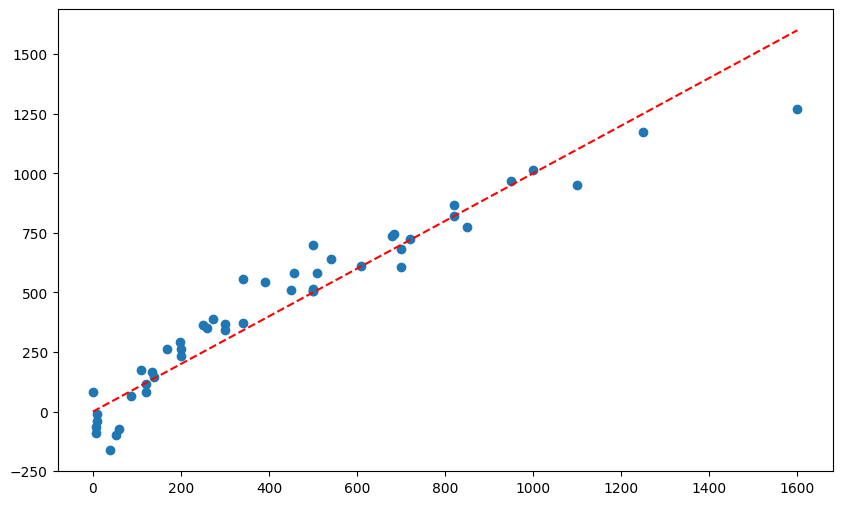

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

In [ ]:
type(x_test)

pandas.core.frame.DataFrame

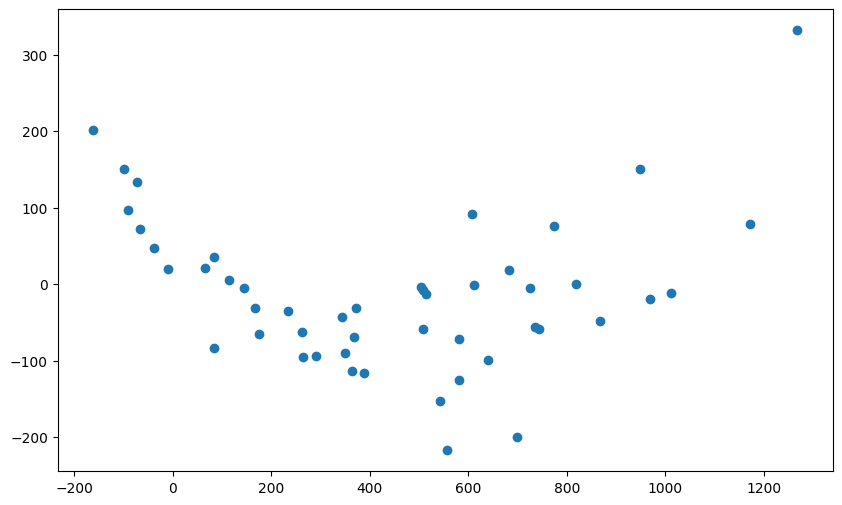

In [ ]:
plt.scatter(y_pred,residual)

# Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
x_test_poly = pf.transform(x_test)

In [ ]:
x_train_poly.shape

(111, 91)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_poly,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y_pred_poly = lr.predict(x_test_poly)

In [ ]:
residual = y_test - y_pred_poly

In [ ]:
y_pred_poly.shape

(48,)

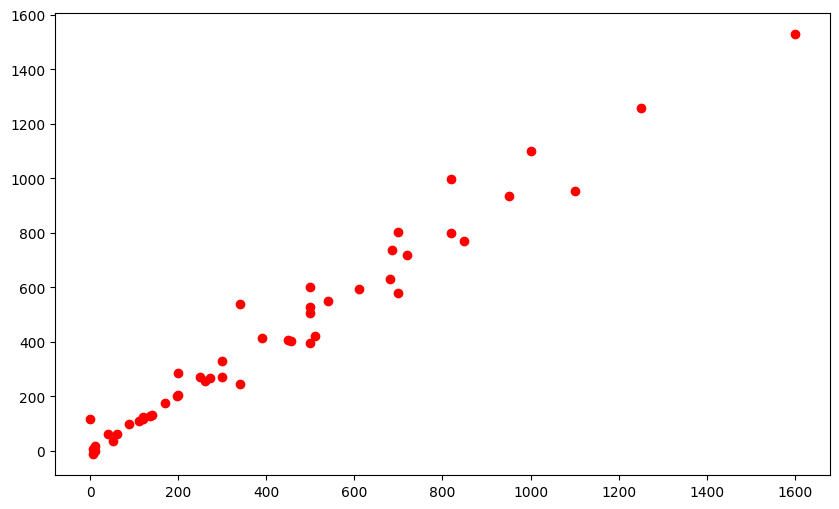

In [ ]:
plt.scatter(y_test,y_pred_poly,c = 'r')

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
score = r2_score(y_test,y_pred_poly)
mse = mean_squared_error(y_test,y_pred_poly)
mae = mean_absolute_error(y_test,y_pred_poly)

print("r2 score ",score)
print("mse = ",mse)
print("mae = ",mae)


r2 score  0.9657296831025106
mse =  4478.567470834651
mae =  44.70336489906229


<Axes: xlabel='Weight', ylabel='Count'>

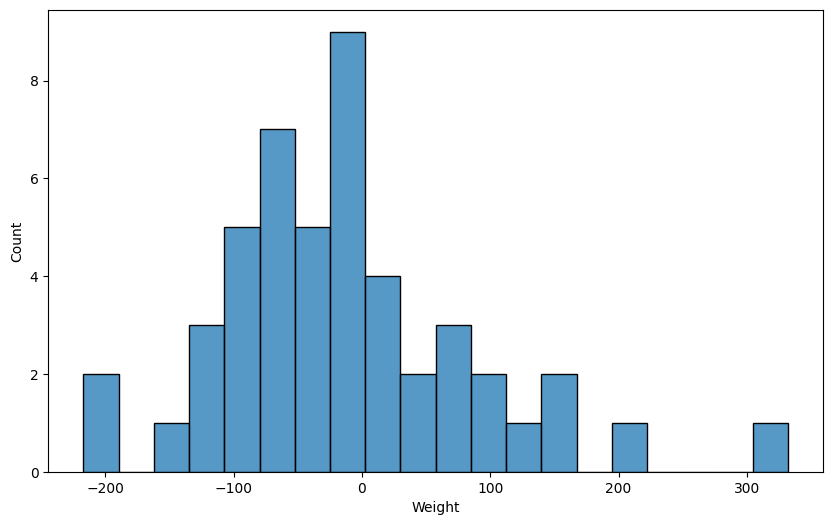

In [ ]:
sns.histplot(residual,bins = 20)

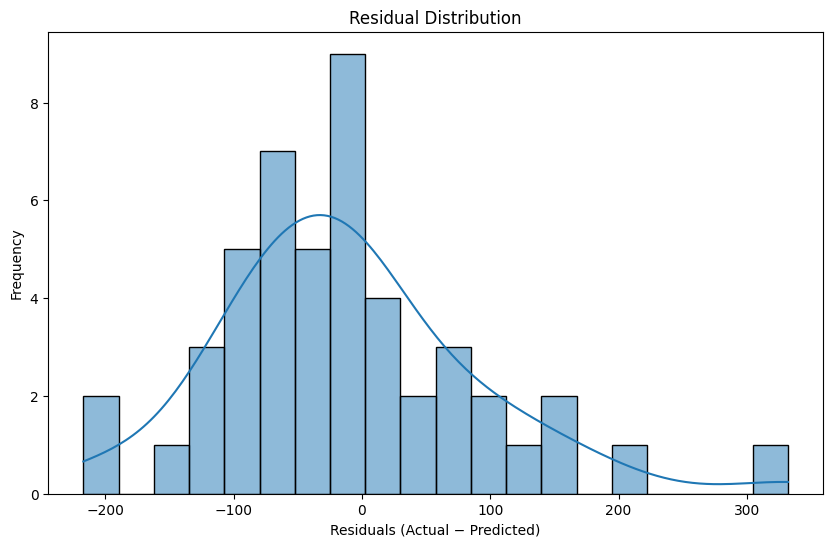

In [ ]:
sns.histplot(residual, bins=20, kde=True)
plt.xlabel("Residuals (Actual − Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


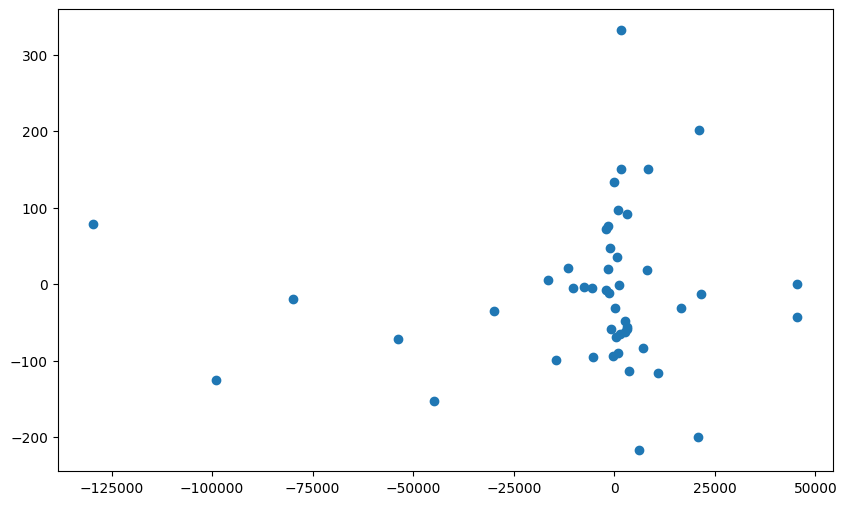

In [ ]:
plt.scatter(y_pred_poly,residual)